**PCA & NMF**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score, roc_curve, auc

#Get data
wine = pd.read_csv("/content/winequality-red.csv", sep=';')
print(wine.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
def normalize_column_1_to_0(X):
  min = np.min(X)
  max = np.max(X)
  return (X-min)/(max-min)



In [ ]:
# Split data: We do this first to avoid data leakage
x_train, x_test, y_train, y_test = train_test_split(wine.drop('quality', axis=1), wine['quality'], test_size=0.2)
# Normalize data:
x_train_norm = x_train
x_test_norm = x_test
for col in x_train.columns:
  x_train_norm[col] = normalize_column_1_to_0(x_train[col])
  x_test_norm[col] = normalize_column_1_to_0(x_test[col])


In [ ]:
# 1)a-
# Train an unregularized logistic regression
unreg_LR = LogisticRegression(penalty=None)
unreg_LR.fit(x_train_norm, y_train)

# Predict Test set
y_pred = unreg_LR.predict(x_test_norm)
print(unreg_LR.score(x_test_norm, y_test))


0.53125


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 1)b-
# PCA
for i in range(len(x_train_norm.columns)):
  pca = PCA(n_components=i,random_state=99)
  pca.fit(x_train_norm)
  if (pca.explained_variance_ratio_.sum()) >= 0.95:
    print(f'{i} components explain 95% of the variance')
    break


8 components explain 95% of the variance


In [ ]:
print(pd.DataFrame(pca.components_,columns=x_train.columns,index = ['PC-1','PC-2','PC-3',
                                                                    'PC-4','PC-5','PC-6','PC-7','PC-8']))


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC-1       0.515767         -0.214538     0.657178        0.057235   0.071393   
PC-2      -0.062260         -0.280641     0.252944       -0.048914  -0.073164   
PC-3      -0.162258         -0.178807     0.205004        0.136132   0.016708   
PC-4       0.345900          0.460151    -0.164633        0.391294  -0.154905   
PC-5      -0.270389         -0.147574     0.082632        0.284060   0.205701   
PC-6       0.067247          0.434499    -0.159026       -0.161068   0.422191   
PC-7      -0.371424          0.435343     0.478657        0.314883   0.269818   
PC-8      -0.121119         -0.359402    -0.328514        0.694407   0.062024   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
PC-1            -0.075158             -0.011329  0.333630 -0.334339   
PC-2            -0.167640             -0.204210 -0.434519  0.087480   
PC-3             0.758091              0.521827 -0.116077

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

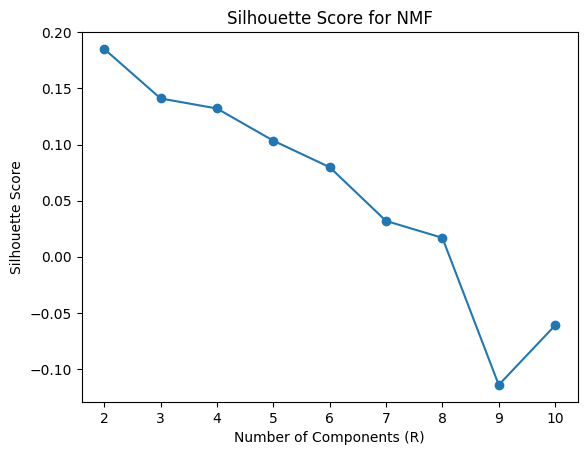

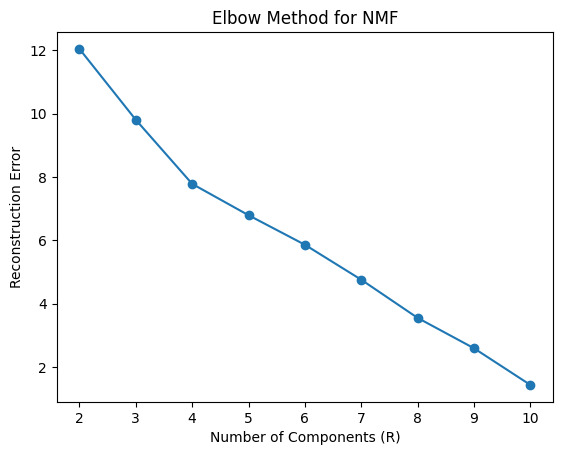

In [ ]:
# 1)c-


# NMF on not normalize data
error = []
scores = []
for r in range(2,len(x_train.columns)):
    nmf = NMF(n_components=r, init='random', random_state=99)
    W = nmf.fit_transform(x_train)
    nmf.reconstruction_err_
    error.append(nmf.reconstruction_err_)
    labels = W.argmax(axis=1)
    scores.append(silhouette_score(x_train, labels))


plt.plot(range(2, len(x_train.columns)), scores, marker='o')
plt.xlabel('Number of Components (R)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for NMF')
plt.show()
plt.plot(range(2,len(x_train.columns)), error, marker='o')
plt.xlabel('Number of Components (R)')
plt.ylabel('Reconstruction Error')
plt.title('Elbow Method for NMF')
plt.show()

In [ ]:
nmf = NMF(n_components=5, init='random', random_state=99)
W = nmf.fit_transform(x_train)
print(pd.DataFrame(nmf.components_,columns=x_train.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5']))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC-1       0.331479          0.554953     0.000000        0.091401   0.132528   
PC-2       0.000000          0.000000     0.137179        0.000000   0.134607   
PC-3       0.000000          0.137737     0.000000        0.033979   0.000000   
PC-4       0.000000          0.000000     0.138994        0.260546   0.000000   
PC-5       0.876354          0.006847     0.850953        0.138988   0.054486   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
PC-1             0.006668              0.033553  0.735282  0.524398   
PC-2             0.013440              0.019110  0.113016  0.110346   
PC-3             0.077260              0.000000  0.000000  0.419483   
PC-4             1.385160              0.973531  0.083837  0.061269   
PC-5             0.000000              0.013920  0.692615  0.000000   

      sulphates   alcohol  
PC-1   0.104762  0.000000  
PC-2   0.218108  0.000000  
PC

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:

#1)d-
pca = PCA(n_components=8,random_state=99)
nmf = NMF(n_components=5, init='random', random_state=99)
pca_train= pca.fit_transform(x_train_norm)
nmf_train = nmf.fit_transform(x_train)
pca_test = pca.transform(x_test_norm)
nmf_test = nmf.transform(x_test)

print(f'PCA dataset shape: {pca_train.shape}')
print(f'NMF dataset shape: {nmf_train.shape}')
# Unregularized LR model on normalized dataset
# Train an unregularized logistic regression
unreg_LR = LogisticRegression(penalty=None)
unreg_LR.fit(x_train_norm, y_train)

# Predict Test set
y_pred = unreg_LR.predict(x_test_norm)
print(f'Normalized dataset score: {unreg_LR.score(x_test_norm, y_test)}')

# Unregularized LR model on PCA dataset
# Train an unregularized logistic regression
unreg_LR_pca = LogisticRegression(penalty=None)
unreg_LR_pca.fit(pca_train, y_train)

# Predict Test set
y_pred_pca = unreg_LR_pca.predict(pca_test)
print(f'PCA dataset score: {unreg_LR_pca.score(pca_test, y_test)}')

# Unregularized LR model on NMF dataset
# Train an unregularized logistic regression
unreg_LR_nmf = LogisticRegression(penalty=None)
unreg_LR_nmf.fit(nmf_train, y_train)

# Predict Test set
y_pred_nmf = unreg_LR_nmf.predict(nmf_test)
print(f'NMF dataset score: {unreg_LR_nmf.score(nmf_test, y_test)}')



PCA dataset shape: (1279, 8)
NMF dataset shape: (1279, 5)
Normalized dataset score: 0.53125
PCA dataset score: 0.546875
NMF dataset score: 0.525


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

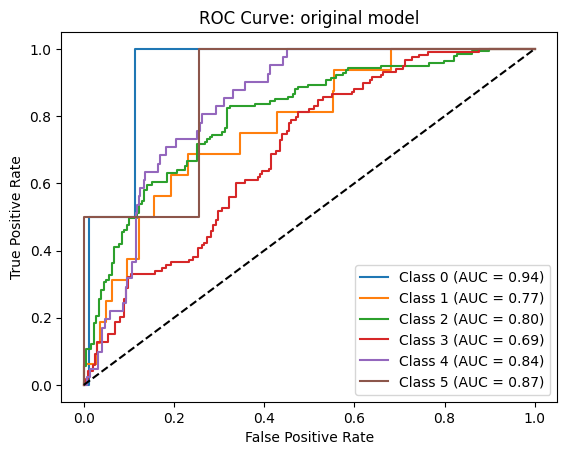

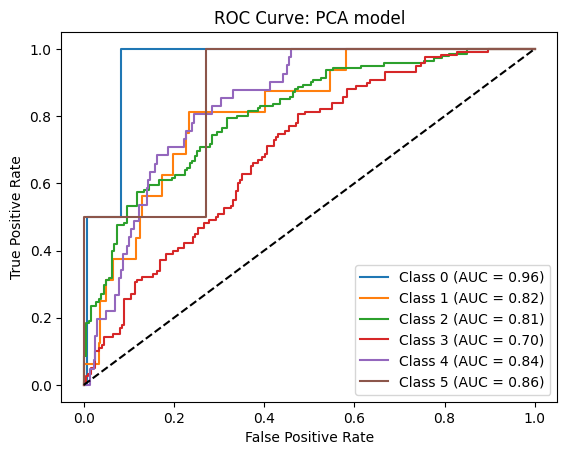

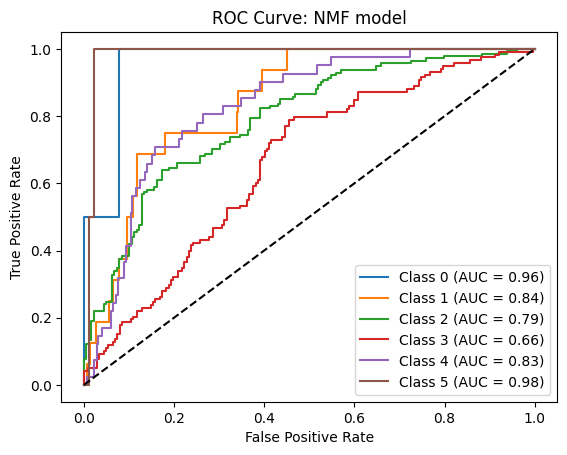

In [ ]:
# ROC curve
from sklearn.preprocessing import label_binarize

# Binarize labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Original
y_prob = unreg_LR.predict_proba(x_test_norm)
# Compute ROC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve: original model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



# PCA
y_prob_pca = unreg_LR_pca.predict_proba(pca_test)
# Compute ROC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_pca[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve: PCA model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



# NMF
y_prob_nmf = unreg_LR_nmf.predict_proba(nmf_test)
# Compute ROC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_nmf[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve: NMF model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
print(y_prob)

[[2.61721582e-06 9.59144709e-03 3.82420296e-02 2.63905371e-01
  4.30378523e-01 2.57880013e-01]
 [1.22082065e-03 2.02430447e-02 9.20069459e-01 5.79597372e-02
  4.35031989e-04 7.19064444e-05]
 [9.86825425e-04 1.62855543e-02 6.12831797e-01 3.46630427e-01
  2.30056229e-02 2.59774281e-04]
 ...
 [2.31511132e-05 8.29178940e-03 3.84057619e-02 3.30553573e-01
  4.61405300e-01 1.61320425e-01]
 [3.58894848e-09 6.61226395e-05 1.60334528e-03 9.42429093e-02
  5.18909136e-01 3.85178483e-01]
 [2.95300402e-02 2.06038511e-02 4.22914084e-01 4.55277621e-01
  5.26487756e-02 1.90256281e-02]]


**Illustrating the “curse of dimensionality”**

In [4]:
import matplotlib.pyplot as plt


In [17]:
1-0.99**1000

0.9999568287525893

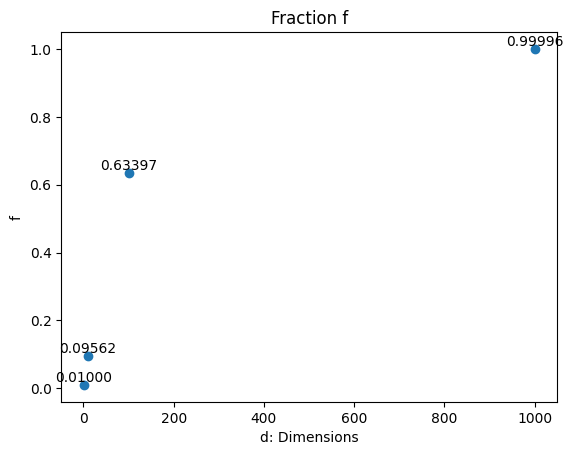

In [18]:
d = [1,10,100,1000] # dimensions
a = 1 #radio
S = 1 #surface area of a unit hypersphere
e = 0.01 # 0 < e < a , e/a = 0.01
#V = (S * (a**d))/d
#f = 1-(1-e/a)**d

points = []
for dim in d:
  f = 1-(1-e/a)**dim
  points.append(f)

plt.scatter(d, points)
plt.title('Fraction f')
plt.xlabel('d: Dimensions')
plt.ylabel('f')
for i in range(len(d)):
    plt.text(d[i], points[i], f'{points[i]:.5f}', ha='center', va='bottom')

plt.show()